# Lineare Regression (Demo)

# 1 - Imports und Funktionen

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import sklearn.datasets
import h5py
import scipy
from scipy import ndimage
from scipy.special import expit
from PIL import Image
import seaborn as sns

import pandas as pd
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

%matplotlib inline


In [3]:
# Lineare Regression vorhersage
def h(w, x):
    return np.dot(w, x)

In [4]:
def plot_linear_function(ax, w, X, y, title=""):
    """
    Plot data points (x, y) and a 1D linear function h(x) = w_0 + w_1 * x.

    Args:
        ax (matplotlib.axes.Axes): The axes to plot on.
        w (np.ndarray): Weight vector [[w0], [w1]].
        X (np.ndarray): 1D array of feature values.
        y (np.ndarray): 1D array of target labels.
        title (str): Title for the plot.
    """
    # Plot dataset points
    ax.scatter(X, y, color="blue", label='Data Points')

    # Create x values for the line
    x_min, x_max = X.min() - 0.1, X.max() + 0.1
    x_vals = np.linspace(x_min, x_max, 100)

    # Calculate y values for the linear function: h(x) = w[0] + w[1] * x
    # Assuming w = [w0, w1]
    y_vals = w[0,0] + w[1,0] * x_vals

    # Plot the linear function
    ax.plot(x_vals, y_vals, color='red', linestyle='-', label=f'h(x) = {w[0,0]:.2f} + {w[1,0]:.2f}x')

    ax.set_title(title)
    ax.set_xlabel('Feature X')
    ax.set_ylabel('Label y')
    ax.legend()
    ax.grid(True)

# 2 - Datensatz

In [5]:
#load dataset
df = sns.load_dataset("mpg")

In [6]:
# Display first and last five entries in df in one single table by
# concatenating the head and tail
combined_df = pd.concat([df.head(5), df.tail(5)])
display(combined_df)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger
397,31.0,4,119.0,82.0,2720,19.4,82,usa,chevy s-10


In [7]:
# describe dataset
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [8]:
# Ein Merkmal             : Horsepower (Perdestärke, kurz PS)
# Unser Zielwert ist MPG  : Meilen pro Gallone
# Wir verwenden nur ein Merkmal, damit Datenpunkte und Modell auf der
# (x,y)-Ebene visualisierbar sind (siehe Plots weiter unten).

df = df.dropna()    # Einträge mit leeren Zellen löschen

X = df[["horsepower"]].values
y = df[["mpg"]].values

In [9]:
print(X.shape)
print(y.shape)

(392, 1)
(392, 1)


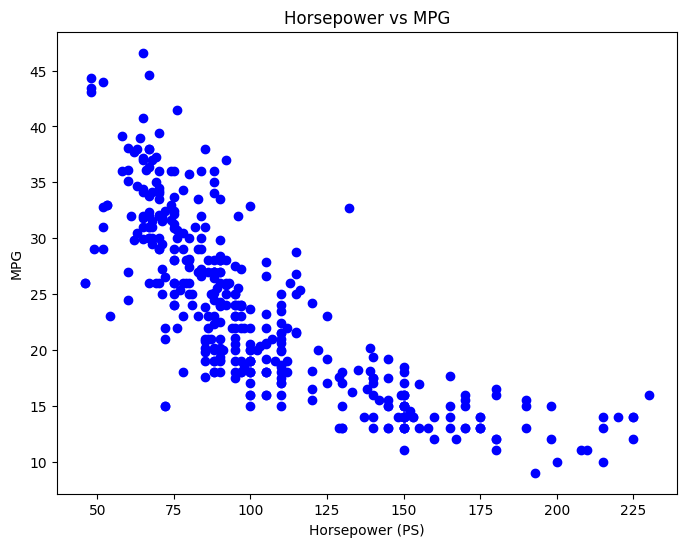

In [10]:
# plot X, y with axis labels
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color="blue", label='Data Points')
plt.xlabel("Horsepower (PS)")
plt.ylabel("MPG")
plt.title("Horsepower vs MPG")
plt.show()

In [11]:
# ----------------------------------------------------
# Bias-Term hinzufügen: X → [1, x1]
# ----------------------------------------------------
Xb = np.hstack([np.ones((X.shape[0], 1)), X])
Xb = Xb.T               # ein Datenpunkt pro Spalte (für die Konsistenz mit Folien)
yb = y.T                # ein Datenpunkt pro Spalte (für die Konsistenz mit Folien)
print(X.shape)
print(Xb.shape)
print(yb.shape)
#print(X)
#print(y)

(392, 1)
(2, 392)
(1, 392)


# 3 - Lineares Regressionsmodell


In [12]:
# Lineares Regressionsmodell
def h(w, X):
  z=np.dot(w.T, X)
  a = z
  return a

In [13]:
# ----------------------------------------------------
# Gewichtsparameter zufällig initialisieren
# ----------------------------------------------------
#np.random.seed(42)
#w = np.random.rand(3)

# Für die Demo starten wir mit "netten" Werten
w = np.array([[25], [0]])
print(w.shape)

(2, 1)


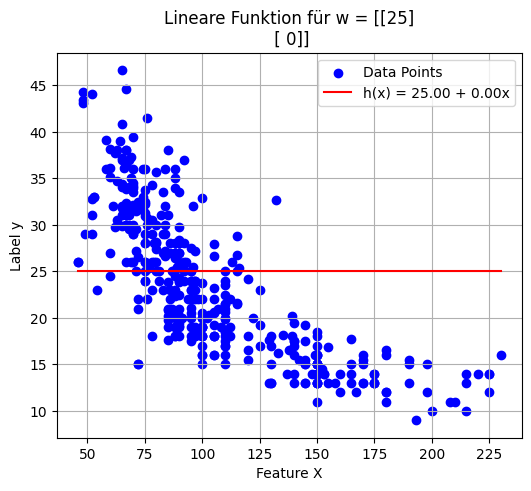

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(6, 5))
plot_linear_function(ax, w, X, y, title=f"Lineare Funktion für w = {w}")
plt.show()


In [15]:
# Vorhersagen A = w.T  X
A = h(w, Xb)
print(w.T.shape)
print(Xb.shape)
print(A.shape)

(1, 2)
(2, 392)
(1, 392)


In [16]:
# remove all columns except mpg and horsepower
df = df[["horsepower", "mpg"]]
df['pred'] = A.T
display(df.head(7))

,horsepower,mpg,pred
0,130.0,18.0,25.0
1,165.0,15.0,25.0
2,150.0,18.0,25.0
3,150.0,16.0,25.0
4,140.0,17.0,25.0
5,198.0,15.0,25.0
6,220.0,14.0,25.0


# 4 - Gradientenabstieg

## 4.1 Verlust (Loss)

In [17]:
# Squared Error
def loss(A, y):
  return (A - y) ** 2

In [18]:
L = loss(A,yb)
print(L.shape)

(1, 392)


In [19]:
df['loss'] = L.T
display(df.head(7))

,horsepower,mpg,pred,loss
0,130.0,18.0,25.0,49.0
1,165.0,15.0,25.0,100.0
2,150.0,18.0,25.0,49.0
3,150.0,16.0,25.0,81.0
4,140.0,17.0,25.0,64.0
5,198.0,15.0,25.0,100.0
6,220.0,14.0,25.0,121.0


## 4.2 Kosten

In [20]:
# Kosten (Durchschnittlicher Verlust)
m = y.shape[0]
J = (1/m) * np.sum(L, axis=1)
print(f"Kosten: {J}")

Kosten: [63.17790816]


## 4.3 Gradientenabstieg

In [21]:
dw0 = 2*(A - yb)
dw1 = 2*(A - yb) * Xb[1,:]
print(dw0.shape)
print(dw1.shape)

(1, 392)
(1, 392)


In [22]:
# add dw0 and dw1 as columns to df
df['dw0'] = dw0.T
df['dw1'] = dw1.T
display(df.head(7))

,horsepower,mpg,pred,loss,dw0,dw1
0,130.0,18.0,25.0,49.0,14.0,1820.0
1,165.0,15.0,25.0,100.0,20.0,3300.0
2,150.0,18.0,25.0,49.0,14.0,2100.0
3,150.0,16.0,25.0,81.0,18.0,2700.0
4,140.0,17.0,25.0,64.0,16.0,2240.0
5,198.0,15.0,25.0,100.0,20.0,3960.0
6,220.0,14.0,25.0,121.0,22.0,4840.0


In [23]:
# Durchschnitt über alle dw-Werte
dw_0 = np.mean(dw0)
dw_1 = np.mean(dw1)
print(f"dw_0: {dw_0}")
print(f"dw_1: {dw_1}")

dw_0: 3.1081632653061226
dw_1: 791.230612244898


In [24]:
# Vektorisierte Berechnung über den gesamten Datensatz
dw = 2 * 1/m * np.dot(Xb, (A-yb).T)
print(dw)
print(dw.shape)

[[  3.10816327]
 [791.23061224]]
(2, 1)


## 4.2 Gewichtsaktualisierung

In [25]:
# Lernrate / Schrittweite
lr = 0.0001

In [26]:
# Gewichte aktualisieren
w_new = w - lr * dw
print(w_new)

[[24.99968918]
 [-0.07912306]]


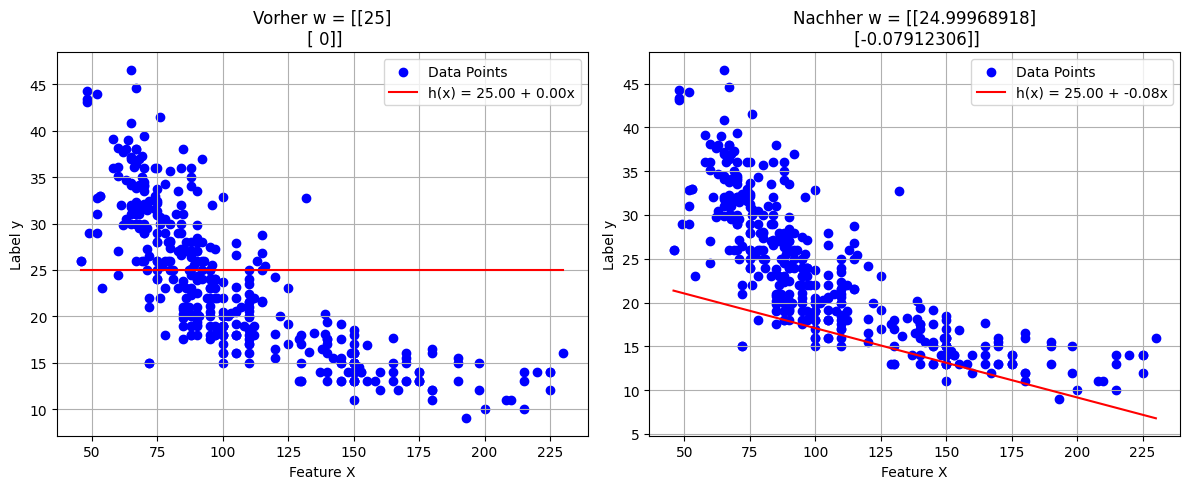

In [27]:
# ----------------------------------------------------
# PLOT vorher-nachher
# ----------------------------------------------------
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
t = f"Grenze für w = {w}"
plot_linear_function(ax[0], w,     X, y, title=f"Vorher w = {w}")
plot_linear_function(ax[1], w_new, X, y, title=f"Nachher w = {w_new}")

plt.tight_layout()
plt.show()

# 5 - Training des Modells

In [63]:
# Parameter und Hyperparameter initialisieren
w_new = np.array([[25], [0]])
lr = 0.00001

## Wiederholte Gewichtsaktualisierungen

* Beobachten Sie die Kosten!
* Experimentieren Sie mit unterschiedlichen Lernraten!


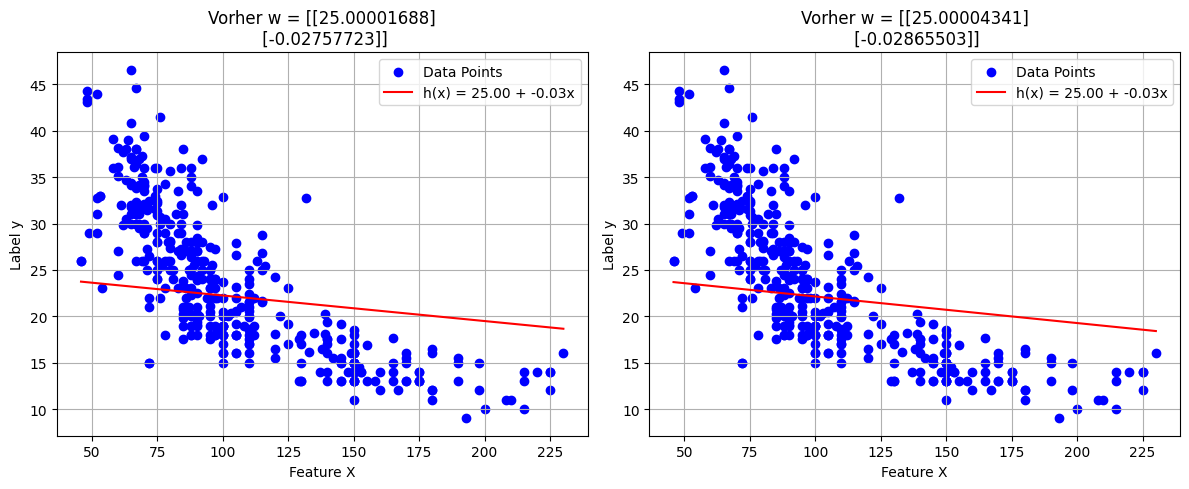

----> Kosten: [50.78180365]


In [71]:
# Loop: Diese Zelle wiederholt ausführen und generierten Plot beobachten
w = w_new

# ----------------------------------------------------
# 1. Vorhersagen und Kosten berechnen
# ----------------------------------------------------
A = h(w, Xb)
L = loss(A,yb)
J = (1/m) * np.sum(L, axis=1)

# ----------------------------------------------------
# 2. Gradient Berechnen
# ----------------------------------------------------
dw = dw = 2 * 1/m * np.dot(Xb, (A-yb).T)

# ------------------------------------------------------
# 3. Gewichtsaktualisierung
# ------------------------------------------------------
w_new = w - lr * dw

# ----------------------------------------------------
# PLOT vorher-nachher
# ----------------------------------------------------
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
plot_linear_function(ax[0], w,     X, y, title=f"Vorher w = {w}")
plot_linear_function(ax[1], w_new, X, y, title=f"Vorher w = {w_new}")

plt.tight_layout()
plt.show()
print(f"----> Kosten: {J}")

# 6 - Animation

In [32]:
def linear_updates(Xb, yb, w_init, max_steps=100, lr=0.00001):
    w = w_init.copy()
    m = Xb.shape[1] # Number of samples

    for step in range(max_steps):
        # 1. Calculate predictions (A) and cost (J)
        A = h(w, Xb)
        L = loss(A,yb)
        J = (1/m) * np.sum(L, axis=1)

        # Yield weights and associated cost
        yield w, J

        # 2. Calculate gradients (dw)
        dw = (1/m) * np.dot(Xb, (A - yb).T)

        # 3. Update weights
        w = w - lr * dw

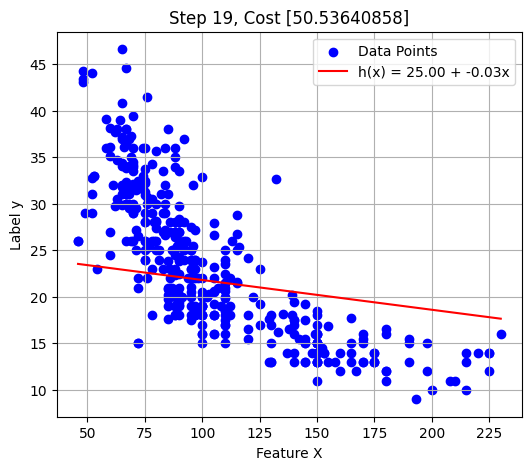

In [33]:
# ----------------------------------------------------
# Matplotlib animation
# ----------------------------------------------------

from matplotlib.animation import FuncAnimation

# Re-initialize w and lr to ensure consistent starting point for animation
w_init = np.array([[25], [0]])
lr_animation = 0.0001

fig, ax = plt.subplots(figsize=(6, 5))

# Call the updated logistic_updates function with Xb and yb
# Using max_steps=100 for a longer animation to better observe the issue
updates = list(linear_updates(Xb, yb, w_init, max_steps=20, lr=lr_animation))

def animate(frame):
    ax.clear() # Clear the previous frame's content
    w, J = updates[frame]
    title = f"Step {frame}, Cost {J}"
    plot_linear_function(ax, w, X, y)
    ax.set_title(title)

ani = FuncAnimation(
    fig, animate, frames=len(updates),
    interval=200, repeat=False
)
# Save the animation with a new filename
ani.save("linear_regression.gif", writer="imagemagick", fps=1)
plt.show()

In [ ]:
import base64
from IPython.display import HTML

gif_data = base64.b64encode(open("linear_regression.gif", "rb").read()).decode()
HTML(f'<img src="data:image/gif;base64,{gif_data}">')

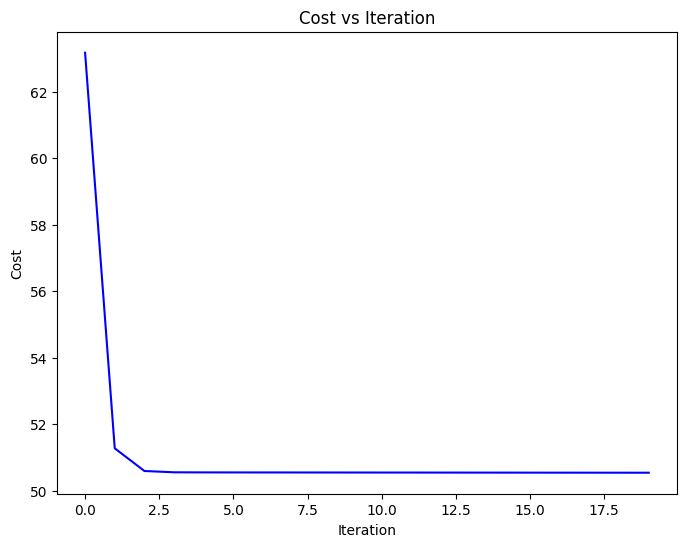

In [35]:
# plot the cost over time
plt.figure(figsize=(8, 6))
plt.plot(range(len(updates)), [J for _, J in updates], color="blue", label='Cost')
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost vs Iteration")
plt.show()

# 7 - Übung

In [ ]:
# 1. Wiederholen Sie das ganze mit sieben Merkmalen
#    - Spalte "name" ausschließen
#    - Wie repräsentieren Sie die Werte in Spalte "origin" als Zahlen?
#    - h(x) = w0 + w1*x1 + w2*x2 + ... + w7*x7
#    - Visualisierung der Datenpunkte im 7-dimensionalen Raum nicht möglich
#    ----> Güte des Modells durch dessen Kosten J beobachten

In [ ]:
# 2. Wiederholen Sie das ganze mit den zwei Merkmalen x1 und x1^2
#    - h(x) = w0 + w1*x1 + w2*x1^2
#    - h(x) ist ein Polynom zwiten Grades!
#    - Visualisierung der Datenpunkte und des Polynoms im (x1,y)-Raum möglich